#Support Vector Machines from Scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA

In [3]:
def scatter_plot(data):
    for x, y_in, l in data:
        if l == 1: 
            clr = 'red'
        else: 
            clr = 'blue'
        plt.scatter(x, y_in, c=clr,s=4)
    
def line_plot(X,w,points,orig_plot=False):
    x1 = np.linspace(np.amin(X),np.amax(X), num=points)
    orig = 0.5*x1 + 0.25
    x2 = -(((w[1])/w[2])*x1+w[0]/w[2])
    if orig_plot:
        plt.plot(x1, x2,'g-',label='Decision Boundary')
        plt.plot(x1,orig,'k-',label='Original')
        plt.xticks([])
        plt.yticks([])
        plt.legend(loc='upper left',bbox_to_anchor=(1,1),frameon=False,borderaxespad=0.0)
    else:
        plt.plot(x1,x2,'g-',label='Decision Boundary')
        plt.xticks([])
        plt.yticks([])
        plt.legend(loc='upper left',bbox_to_anchor=(1,1),frameon=False,borderaxespad=0.0)

#Generating Random linearly separable data

#Visualizing the data

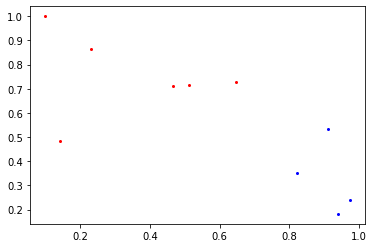

In [4]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
        data[i].append(-1)
    else:
        data[i].append(1)
scatter_plot(data)

#Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can add arguments to svm_function according to your implementation.

In [5]:

def svm_function(x, y, epoch, l_rate):
    x = np.insert(x,0,1,axis=1)
    w = np.zeros(x.shape[1])
    for i in range(epoch):
        ind= np.random.choice(x.shape[0])
        x_i,y_i = x[ind],y[ind]
        eta_i = 1/(l_rate*(i+1))
        score = np.dot(w,x_i)
        if y_i*score < 1:
            w = (1-eta_i*l_rate)*w + eta_i*y_i*x_i
        else:
            w = (1-eta_i*l_rate)*w
    #return min(1,1/(np.sqrt(l_rate)*(np.linalg.norm(w))))*w
    return w

#Run SVM Classifier

In [6]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 20000, 0.001)
print(w)

[ 0.75       -4.47172446  4.34309789]


#Visualize the classifier

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25).

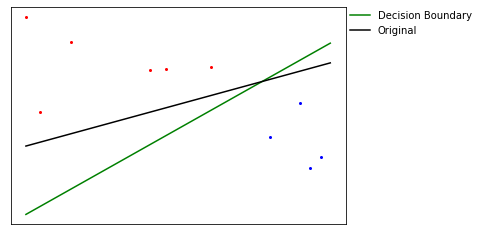

In [7]:
scatter_plot(data)
line_plot(X,w,400,True)
plt.show()

#Linearly Non-separable Data

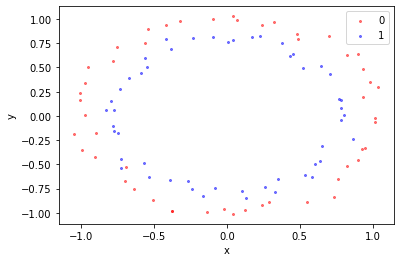

In [8]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, Y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key],s=4,alpha=0.5)
pyplot.show()

#####Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable. These features can be exponential, polynomial, trignometric or any other function of actual input features. For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2). Here you need to think of which hand-crafted features can be best suited for data given to you. Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function. Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'.



In [9]:

# here we could implement simple gaussian kernel as
# no info regarding the data is assumed

def GaussianKernel(data, mean_vector, var_vector):
    """
    Takes as input the mean vector and variance of the 
    Gaussian Kernels. Two-dimensional mean vectors as the
    data is two dimensional.
    """
    output_features = mean_vector.shape[0]
    result = np.zeros((data.shape[0],output_features))
    for i in range(result.shape[1]):
        result[:,i] = np.exp(-np.square(data - mean_vector[i]).sum(axis=1)/(2*var_vector[i])) 
    return result

mean_vector = np.asarray([[0,0],[0.5,0.5],[0.75,0.75]])
sigma_vector = np.asarray([1,0.5,0.36])
sigma = np.asarray([0.7, 1.0, 0.5])
X = np.asarray(X)
X_ = GaussianKernel(X,mean_vector,sigma_vector)

# X_ = np.column_stack((x1,x2,r))
w = svm_function(X_, Y, 100000, 0.0001)
print(w)

[0.7        0.47285234 0.08207757 0.01405848]


Text(0.5, 0.92, 'Feature Space plot of the data-points')

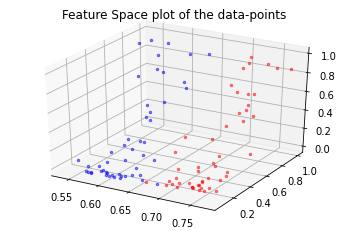

In [10]:

data = np.column_stack((X_,Y))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for x, y, z, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    ax.scatter(x, y, z, c=clr,s=6,alpha=0.5)
plt.title("Feature Space plot of the data-points")

# try to plot the decision boundary
# x_,y_ = np.linspace(0,1,100),np.linspace(0,1,100)
# xv,yv = np.meshgrid(x_,y_)
# line = (w[1]*xv + w[2]*yv + w[0])/w[3]
# ax.plot_surface(x_,y_,line,norm=True)